<a href="https://colab.research.google.com/github/EAFIT-BI/BI-Introduction-2024-1/blob/main/Visualizaci%C3%B3n_de_datos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tablas de frecuencia y diagramas de barras

In [ ]:
import pandas as pd

transactions = pd.read_excel("/content/Transactions.xlsx")
transactions.head(3)

In [8]:
#para la formulación de la tabla de frecuencia
repeat_frequency = transactions['Repeat'].value_counts()
repeat_proportion = transactions['Repeat'].value_counts(normalize = True)

In [14]:
repeat_frequency.values

array([140,  60])

In [11]:
sex_frequency = transactions['Sex'].value_counts()
sex_proportion = transactions['Sex'].value_counts(normalize = True)

In [ ]:
#podemos formular una tabla con la frecuencia y la frecuencia relativa
pd.DataFrame({'Frequency': repeat_frequency,
              'Relative Frequency': repeat_proportion})

In [ ]:
#en el caso del gráfico de barras
import seaborn as sns

colors = ["skyblue", "salmon"]

ax = sns.barplot(x = repeat_frequency.index,
                 y = repeat_frequency.values,
                 palette = colors, legend = False, hue = repeat_frequency.index)
ax.set(ylim = (0,160), ylabel = 'Frequency');

ax.bar_label(ax.containers[0]);

In [ ]:
colors = ["yellow", "greenyellow"]

ax = sns.barplot(x = sex_frequency.index,
                 y = sex_frequency.values,
                 palette = colors, legend = False, hue = sex_frequency.index)
ax.set(ylim = (0,160), ylabel = 'Frequency');

ax.bar_label(ax.containers[0]);

## Histogramas

Para graficar un histograma es importante tener presente el número de bins y el ancho de los mismos.

En este caso, tendremos que tener presentes el mínimo y el máximo, así:

$$\text{ancho bins} = \frac{\max - \min}{\text{número de bins}}$$

In [24]:
numero_bins = 5
ancho_bins = (transactions['Income'].max()-transactions['Income'].min())/numero_bins

In [25]:
ancho_bins

41.8

In [27]:
transactions['Income'].max()

240

In [28]:
import numpy as np

#hacemos un arreglo para los intervalos
intervals = np.linspace(start = 0, stop = 250, num = 6)

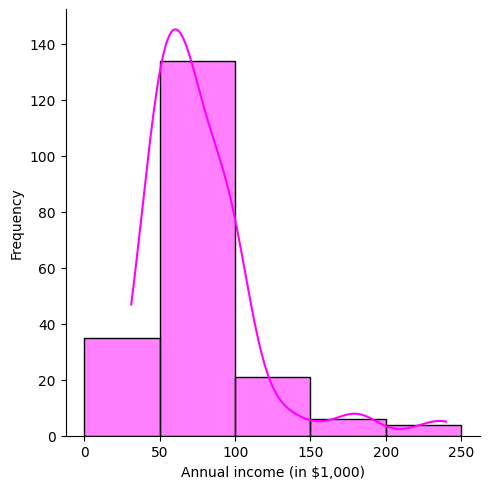

In [74]:
#graficamos el histograma
ax = sns.displot(transactions.Income, bins = intervals, color = 'magenta', kde = True)
ax.set(xlabel = 'Annual income (in $1,000)',
       ylabel = 'Frequency');

## Tablas de contingencia y diagramas de barras apilados

En este caso dejamos de analizar variables de forma independiente e iniciamos el análisis de relaciones entre variables

In [ ]:
promotion = pd.read_excel("/content/Promotion.xlsx")
promotion.tail(3)

In [38]:
#iniciamos con la tabla de contingencia
props = pd.crosstab(index = promotion.Location,
                      columns = promotion.Purchase,
                      margins = True,
                      normalize = 'all')

In [40]:
round(props*100, 2)

Purchase,no,yes,All
Location,,,
Midwest,17.83,12.83,30.67
Northeast,6.83,17.00,23.83
South,4.00,21.67,25.67
West,3.00,16.83,19.83
All,31.67,68.33,100.00


In [ ]:
#en el caso del gráfico, tendremos:

ax = pd.crosstab(index = promotion.Location,
                      columns = promotion.Purchase).plot.bar(stacked = True,
                                                             color = ['blue', 'yellow'])

## Diagramas de dispersión y gráficos de líneas

Estos diagramas relacionan dos variables y se diferencian entre sí porque usualmente los diagramas de dispersión muestran pares de puntos aislados, mientras los gráficos de líneas suelen mostrar tendencias.

## Diagramas de dispersión con color y gráficos de burbujas

Este tipo de gráficos suelen mostrar una dimensión más, i.e. relacionan tres variables o más si se manejas 3 ejes.

In [ ]:
# para el primer ejemplo graficaremos la tasa de nacimientos vs la expectativa de vida
# junto con el nivel de desarrollo (variable categórica)

birth = pd.read_excel("/content/Birth_Life.xlsx")
birth.head()

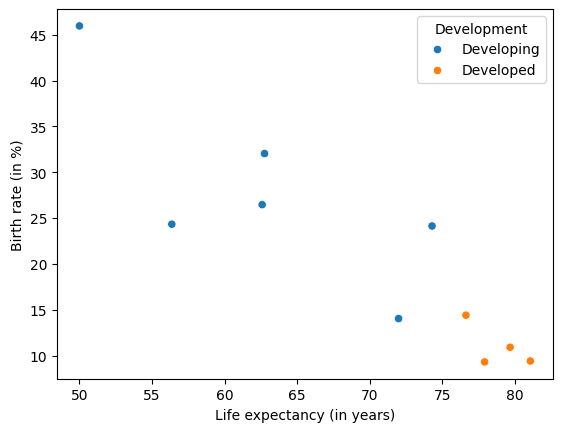

In [52]:
#elaboramos el gráfico de dispersión
ax = sns.scatterplot(x = 'Life_Exp', y = 'Birth_Rate',
                     hue = 'Development', data = birth)

ax.set(xlabel = "Life expectancy (in years)", ylabel = 'Birth rate (in %)');

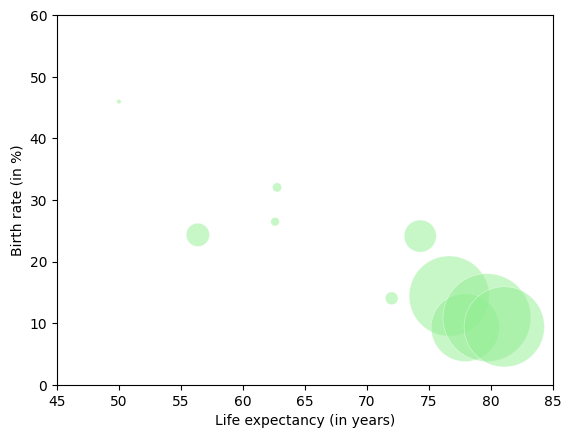

In [55]:
#el gráfico de burbujas, permite incorporar, de otra manera, la tercera variable

ax = sns.scatterplot(x = 'Life_Exp', y = 'Birth_Rate',
                     size = 'GNI', sizes = (10, 4000),
                     color = 'lightgreen', alpha = .5, data = birth)

ax.set(xlabel = "Life expectancy (in years)", ylabel = 'Birth rate (in %)',
       xlim = (45, 85), ylim = (0, 60));
ax.get_legend().remove()

## Mapas de calor

Muestras relaciones como las tablas de contingencia pero de forma gráfica

In [ ]:
bookstore = pd.read_excel('/content/Bookstores.xlsx')
bookstore.head()

In [ ]:
#hacemos la tabla de contingencia que relacione las variable
#las variables de estudio son todas catégoricas

tabla = pd.crosstab(index = bookstore.BookStore,
                    columns = bookstore.BookType,
                    normalize = 'index',
                    margins = False)
round(tabla*100, 2)


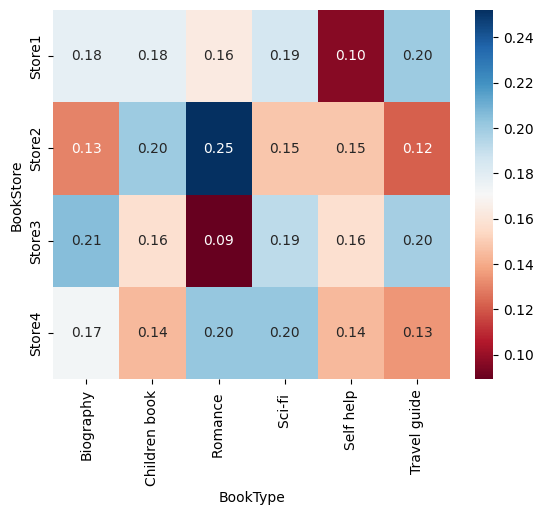

In [60]:
ax = sns.heatmap(tabla, annot = True, fmt = '.2f', cmap = 'RdBu')

In [62]:
#haremos lectura de una base de datos externa (desde internet)
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                 sep = '\s+', header = None, na_values = ['?'],
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
         'model_year', 'origin', 'car_name'])

In [63]:
#hacemos la transformación de la variable origen

df['origin'] = df['origin'].map({1:'USA', 2:'Europe', 3:'Japan'})

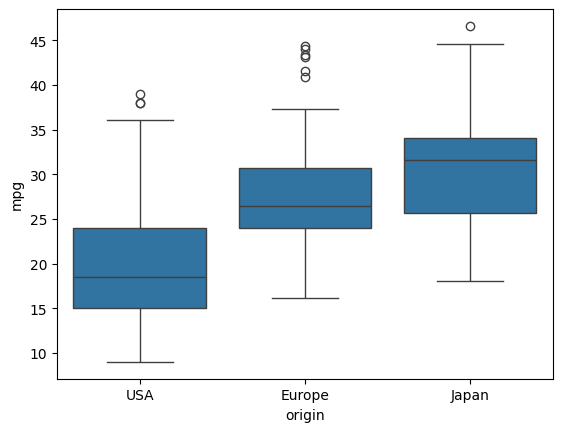

In [68]:
#realizaremos un diagrama de cajas y bigotes con el fin de identificar posibles
#datos atípicos para la variable mpg de acuerdo con el país de origen
sns.boxplot(data = df, x = 'origin', y = 'mpg');

<ipython-input-71-4c7642554f5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'origin', y = 'mpg', palette = "Blues");


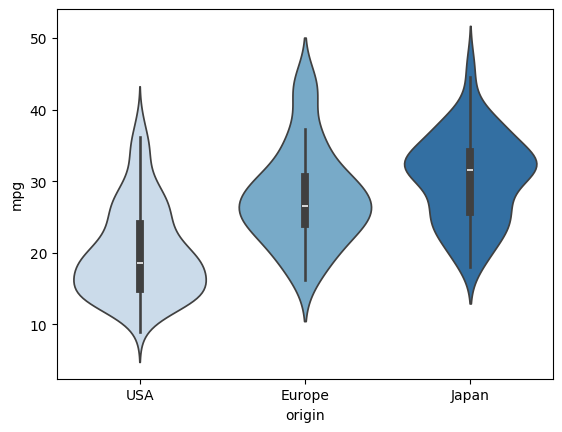

In [71]:
#los diagramas de violín también sirven para observar las distribuciones de la información

sns.violinplot(data = df, x = 'origin', y = 'mpg', palette = "Blues");